In [5]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Specifying colors

[Specifying Colors](https://matplotlib.org/stable/tutorials/colors/colors.html)Specifying Colors
    
* an RGB or RGBA (red, green, blue, alpha) tuple of float values in closed interval [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3));
* a hex RGB or RGBA string (e.g., '#0f0f0f' or '#0f0f0f80'; case-insensitive);
* a shorthand hex RGB or RGBA string, equivalent to the hex RGB or RGBA string obtained by duplicating each character, (e.g., '#abc', equivalent to '#aabbcc', or '#abcd', equivalent to '#aabbccdd'; case-insensitive);
* a string representation of a float value in [0, 1] inclusive for gray level (e.g., '0.5');
* one of the characters {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}, which are short-hand notations for shades of blue, green, red, cyan, magenta, yellow, black, and white. Note that the colors 'g', 'c', 'm', 'y' do not coincide with the X11/CSS4 colors. Their particular shades were chosen for better visibility of colored lines against typical backgrounds.
* a X11/CSS4 color name (case-insensitive);
* a name from the xkcd color survey, prefixed with 'xkcd:' (e.g., 'xkcd:sky blue'; case insensitive);
* one of the Tableau Colors from the 'T10' categorical palette (the default color cycle): {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} (case-insensitive);
* a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (rcParams["axes.prop_cycle"] (default: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))); the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.

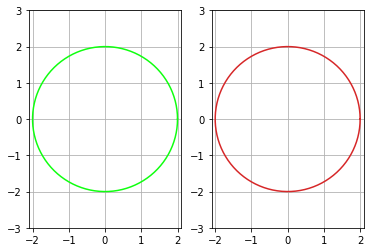

In [14]:
angle = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots(1,2) 

# For the same scaling
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html

# RGB
ax[0].axis('equal')
ax[0].set_xticks(np.linspace(-3, 3, 7))
ax[0].set_yticks(np.linspace(-3, 3, 7))
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-3, 3)
ax[0].grid()

ax[0].plot(2 * np.cos(angle), 2 * np.sin(angle), color='#0fff0f')

# CN
ax[1].axis('equal')
ax[1].set_xticks(np.linspace(-3, 3, 7))
ax[1].set_yticks(np.linspace(-3, 3, 7))
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)
ax[1].grid()

ax[1].plot(2 * np.cos(angle), 2 * np.sin(angle), color='C3')
plt.show()

# Named colors
[List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

> This plots a list of the named colors supported in matplotlib. Note that xkcd colors are supported as well, but are not listed here for brevity.

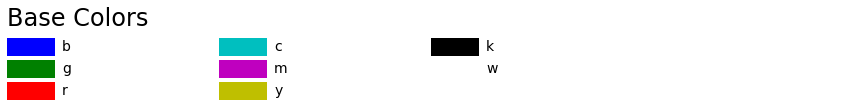

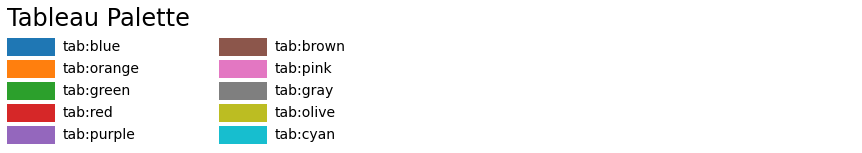

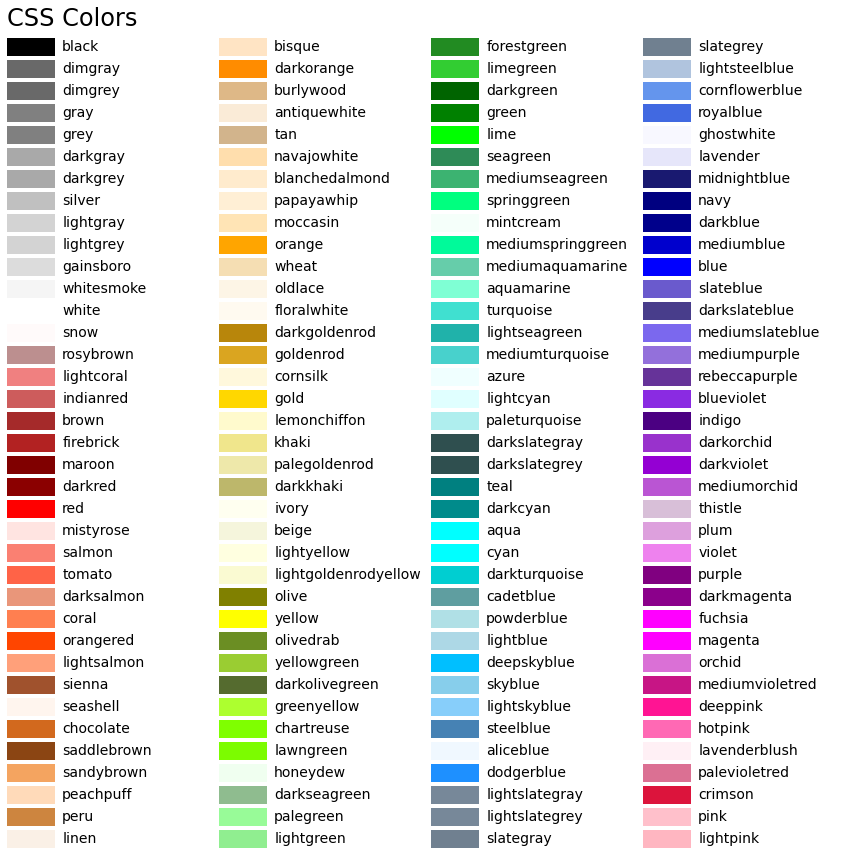

In [2]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name])
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

---

# Color map

* [Color map](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

> Matplotlib has a number of built-in colormaps accessible via matplotlib.cm.get_cmap. There are also external libraries like [palettable](https://matplotlib.org/stable/tutorials/colors/colormaps.html#palettable) and [colorcet](https://matplotlib.org/stable/tutorials/colors/colormaps.html#colorcet) that have many extra colormaps. 